## Library

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint

exec(open('library.py').read())
print('Loaded')

Loaded
Loaded


In [2]:
def plot_anchor(anchor, bins=200, alpha=1, label=None):
    plt.hist(anchor, bins=bins, alpha=alpha, label=label)
    if label:
        print(label)
    pprint(get_percentiles(anchor))
    return None


def sample_tai_log_flop_needs(brain, efficiency, transformative_vs_human, horizon_length, scaling_exponent,
                              flops_per_param_per_sec, params=None, ref_params=11.2, ref_params_samples=12,
                              bayes_update=None, n=1, debug=False):
    if bayes_update is None:
        bayes_update = lambda x: x
    
    n = int(n)
    if n > 1:
        return np.array([sample_tai_log_flop_needs(brain=brain,
                                                   efficiency=efficiency,
                                                   transformative_vs_human=transformative_vs_human,
                                                   horizon_length=horizon_length,
                                                   scaling_exponent=scaling_exponent,
                                                   flops_per_param_per_sec=flops_per_param_per_sec,
                                                   params=params,
                                                   ref_params=ref_params,
                                                   ref_params_samples=ref_params_samples,
                                                   bayes_update=bayes_update,
                                                   debug=debug) for _ in range(n)])
    elif n <= 0:
        return ValueError('n must be >= 1')

    
    brain_ = sample(brain)
    eff_ = sample(efficiency)
    tvh_ = sample(transformative_vs_human)
    h_ = sample(horizon_length)
    e_ = sample(scaling_exponent)
    fpp_ = sample(flops_per_param_per_sec)
    
    if params is None:
        params_ = brain_ + eff_ - fpp_        
        if debug:
            print(f"{brain_} + {eff_} + {tvh_} + {h_} + {ref_params_samples} - {e_} * {ref_params} + {e_} * ({brain_} + {eff_} - {fpp_})")
    else:
        params_ = sample(params)
        if debug:
            print(f"{brain_} + {eff_} + {tvh_} + {h_} + {ref_params_samples} - {e_} * {ref_params} + {e_} * {params_}")
        
    return bayes_update(brain_ + eff_ + tvh_ + h_ + ref_params_samples - e_ * ref_params + e_ * params_)


def cotra_bayes_update_against_low_flop(f):
    f = f + sample(norm(1,3)) if f < 27 and random.random() > 0.3 else f
    f = f + sample(norm(1,3)) if f < 26 and random.random() > 0.2 else f
    f = f + sample(norm(1,3)) if f < 25 and random.random() > 0.1 else f
    f = f + sample(norm(1,3)) if f < 24 else f
    f = 24 if f < 24 else f
    return f


def sample_cotra_anchor(horizon_length, bayes_update=cotra_bayes_update_against_low_flop, n=1):
    return sample_tai_log_flop_needs(brain=lognorm(11,19.5),
                                     efficiency=const(1),
                                     transformative_vs_human=norm(-2,2),
                                     horizon_length=horizon_length,
                                     scaling_exponent=norm(0.5,1.1),
                                     flops_per_param_per_sec=norm(1,2),
                                     bayes_update=bayes_update,
                                     n=n)


print('Loaded')

Loaded


## Cotra's Short NN Anchor

{1: 25.54212299084391,
 5: 26.605841386176852,
 10: 27.212580177039552,
 20: 28.110958207486487,
 30: 29.11500716444763,
 40: 30.263139362572723,
 50: 31.448207307051714,
 60: 32.70312116642806,
 70: 34.110964081067635,
 80: 35.784185957304445,
 90: 38.415083000255684,
 95: 40.66443681214461,
 99: 45.4456046585867}


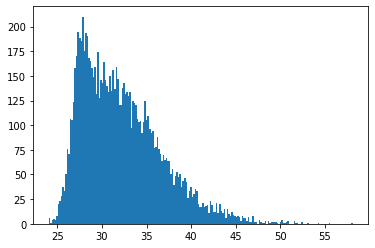

In [3]:
short_horizon_nn_anchor = sample_cotra_anchor(horizon_length=norm(0,3), n=10000)
plot_anchor(short_horizon_nn_anchor)

Before update
{1: 22.011648337222624,
 5: 24.480274971385917,
 10: 25.86081134628109,
 20: 27.667221366231182,
 30: 29.034630811397385,
 40: 30.176486346791094,
 50: 31.33366293440959,
 60: 32.6205005854722,
 70: 33.97971492175236,
 80: 35.71156941549168,
 90: 38.2438674815087,
 95: 40.48462741959548,
 99: 45.50046893190167}
After update
{1: 25.54212299084391,
 5: 26.605841386176852,
 10: 27.212580177039552,
 20: 28.110958207486487,
 30: 29.11500716444763,
 40: 30.263139362572723,
 50: 31.448207307051714,
 60: 32.70312116642806,
 70: 34.110964081067635,
 80: 35.784185957304445,
 90: 38.415083000255684,
 95: 40.66443681214461,
 99: 45.4456046585867}


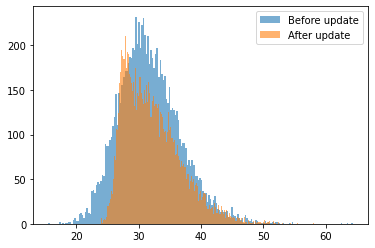

In [4]:
short_no_update = sample_cotra_anchor(horizon_length=norm(0,3), bayes_update=None, n=10000)
plot_anchor(short_no_update, alpha=0.6, label='Before update')
plot_anchor(short_horizon_nn_anchor, alpha=0.6, label='After update')
plt.legend()

## Cotra's Medium NN Anchor

{1: 26.773706571835678,
 5: 27.992653446469,
 10: 29.004349509778528,
 20: 30.74280288012881,
 30: 32.10607987339149,
 40: 33.303763355298564,
 50: 34.45639601323818,
 60: 35.69691227792062,
 70: 37.12403656094444,
 80: 38.84204652642373,
 90: 41.25400586655238,
 95: 43.56314183983469,
 99: 48.467439961528996}


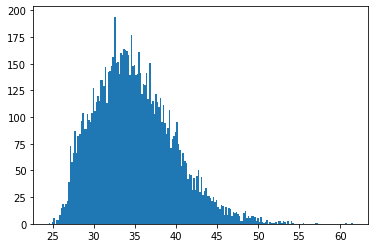

In [5]:
medium_horizon_nn_anchor = sample_cotra_anchor(horizon_length=norm(3,6), n=10000)
plot_anchor(medium_horizon_nn_anchor)

## Cotra's Long NN Anchor

{1: 28.210382356893057,
 5: 30.497279750428817,
 10: 31.86642914828565,
 20: 33.71623261898474,
 30: 35.09385322366111,
 40: 36.320069565188476,
 50: 37.48940674331695,
 60: 38.68509877943389,
 70: 40.2206411995978,
 80: 41.94419329079882,
 90: 44.38747104049999,
 95: 46.56602931980206,
 99: 51.564528738370626}


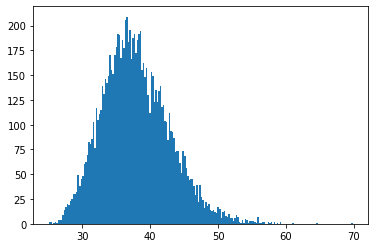

In [6]:
long_horizon_nn_anchor = sample_cotra_anchor(horizon_length=norm(6,9), n=10000)
plot_anchor(long_horizon_nn_anchor)

## Cotra's GPT Anchor

{1: 25.06833906871479,
 5: 26.05700865423931,
 10: 26.650032663400758,
 20: 27.482561687833517,
 30: 28.15938846435057,
 40: 28.93710855996097,
 50: 29.951536030965272,
 60: 31.196372096346224,
 70: 32.534081231786054,
 80: 34.261627734227666,
 90: 36.844042977855565,
 95: 39.26697742673438,
 99: 44.17495242659452}


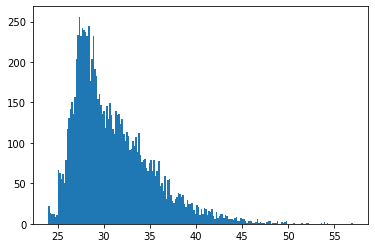

In [7]:
gpt_anchor = sample_cotra_anchor(horizon_length=const(0), n=10000)
plot_anchor(gpt_anchor)

## Cotra's Lifetime Anchor

{1: 25.125024153181226,
 5: 26.0871054100408,
 10: 26.57578464081871,
 20: 27.300858768835955,
 30: 27.818215625752426,
 40: 28.34728237326375,
 50: 28.94904337399891,
 60: 29.739229603530454,
 70: 30.74278025031173,
 80: 31.884557272816586,
 90: 33.57749432157299,
 95: 34.97298217607183,
 99: 37.7497437199469}


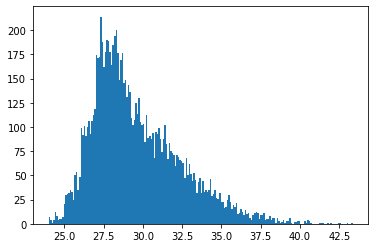

In [8]:
lifetime_anchor = sample_tai_log_flop_needs(brain=lognorm(11,19.5),
                                            efficiency=distributed_lognorm([[2,5],[5,9]],[0.5,0.5]),
                                            transformative_vs_human=norm(-2,2),
                                            horizon_length=const(9),
                                            scaling_exponent=const(0),
                                            flops_per_param_per_sec=const(0),
                                            ref_params_samples=0,
                                            bayes_update=cotra_bayes_update_against_low_flop,
                                            n=10000)
plot_anchor(lifetime_anchor)

## Cotra's Evolution Anchor

{1: 32.561898250046156,
 5: 34.68033801488732,
 10: 35.99219904290138,
 20: 37.69746873686019,
 30: 38.903869053805316,
 40: 39.873150823429334,
 50: 40.79621243866647,
 60: 41.70915741746692,
 70: 42.711408388110286,
 80: 43.94261901571175,
 90: 45.58236847622532,
 95: 46.95455854881281,
 99: 49.52079655915339}


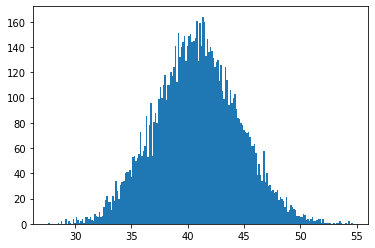

In [9]:
average_ancestor_brain_flops = lognorm(3,6)
log_n_individuals = norm(20,22)
evo_time_log_sec = const(16)
evolution_anchor = [sample_tai_log_flop_needs(brain=average_ancestor_brain_flops,
                                              efficiency=norm(-6,5), # TODO: This seems not quite right
                                              transformative_vs_human=norm(-2,2),
                                              horizon_length=lambda: sample(log_n_individuals) + sample(evo_time_log_sec),
                                              scaling_exponent=const(0),
                                              flops_per_param_per_sec=const(0),
                                              ref_params_samples=0,
                                              bayes_update=None) for s in range(10000)]
plot_anchor(evolution_anchor)


## Cotra's Genome Anchor

{1: 27.875877653144105,
 5: 29.304720185250844,
 10: 30.210226232700094,
 20: 31.39562385566439,
 30: 32.27114836096643,
 40: 33.040571359445195,
 50: 33.790130365480124,
 60: 34.58812019136464,
 70: 35.45068472769005,
 80: 36.48118924283781,
 90: 37.94097568022909,
 95: 39.21537534954318,
 99: 41.95401901030427}


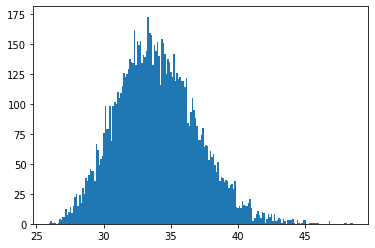

In [10]:
genome_anchor = sample_tai_log_flop_needs(brain=lognorm(11,19.5),
                                          params=norm(8.3,9.44), # Centered on 8.87... there are ~10^8.7 'params' in genome
                                          efficiency=norm(0,2),
                                          transformative_vs_human=norm(-2,2),
                                          horizon_length=norm(7,9),
                                          scaling_exponent=norm(0.5,1.1),
                                          flops_per_param_per_sec=norm(1,2),
                                          bayes_update=cotra_bayes_update_against_low_flop,
                                          n=10000)
plot_anchor(genome_anchor)


## All Cotra Anchors

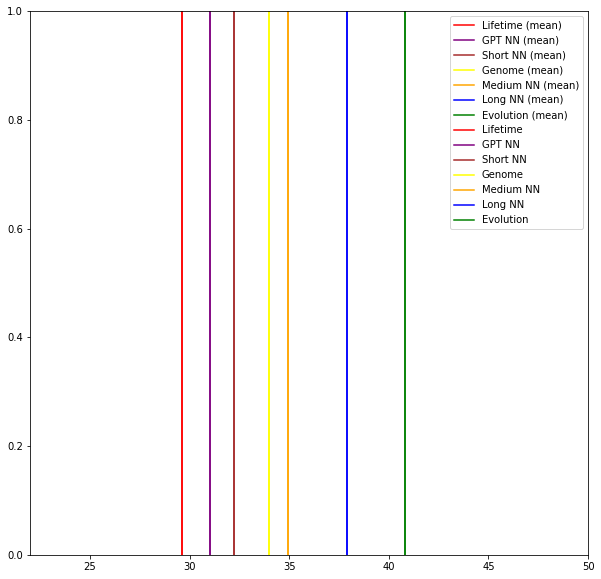

In [11]:
plt.figure(figsize=(10,10))
alpha = 0.6; bins = 100
plt.axvline(x = np.mean(lifetime_anchor), label='Lifetime (mean)', color='red')
plt.axvline(x = np.mean(gpt_anchor), label='GPT NN (mean)', color='purple')
plt.axvline(x = np.mean(short_horizon_nn_anchor), label='Short NN (mean)', color='brown')
plt.axvline(x = np.mean(genome_anchor), label='Genome (mean)', color='yellow')
plt.axvline(x = np.mean(medium_horizon_nn_anchor), label='Medium NN (mean)', color='orange')
plt.axvline(x = np.mean(long_horizon_nn_anchor), label='Long NN (mean)', color='blue')
plt.axvline(x = np.mean(evolution_anchor), label='Evolution (mean)', color='green')

plt.axvline(x = np.mean(lifetime_anchor), label='Lifetime', color='red')
plt.axvline(x = np.mean(gpt_anchor), label='GPT NN', color='purple')
plt.axvline(x = np.mean(short_horizon_nn_anchor), label='Short NN', color='brown')
plt.axvline(x = np.mean(genome_anchor), label='Genome', color='yellow')
plt.axvline(x = np.mean(medium_horizon_nn_anchor), label='Medium NN', color='orange')
plt.axvline(x = np.mean(long_horizon_nn_anchor), label='Long NN', color='blue')
plt.axvline(x = np.mean(evolution_anchor), label='Evolution', color='green')

plt.xlim([22, 50])
plt.legend()
plt.show()

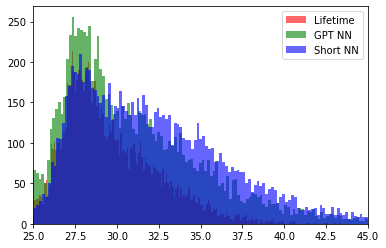

In [12]:
alpha = 0.6
plt.hist(lifetime_anchor, bins=200, alpha=alpha, label='Lifetime', color='red', lw=0)
plt.hist(gpt_anchor, bins=200, alpha=alpha, label='GPT NN', color='green', lw=0)
plt.hist(short_horizon_nn_anchor, bins=200, alpha=alpha, label='Short NN', color='blue', lw=0)
plt.xlim([25, 45])
plt.legend()
plt.show()

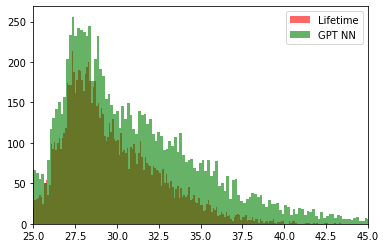

In [13]:
alpha = 0.6
plt.hist(lifetime_anchor, bins=200, alpha=alpha, label='Lifetime', color='red', lw=0)
plt.hist(gpt_anchor, bins=200, alpha=alpha, label='GPT NN', color='green', lw=0)
plt.xlim([25, 45])
plt.legend()
plt.show()

## Simple Lifetime Anchor

Before update
{1: 18.711683008077273,
 5: 20.019033298523414,
 10: 20.705929431957443,
 20: 21.618325508811076,
 30: 22.333834037431053,
 40: 22.966261276125312,
 50: 23.60843434640939,
 60: 24.274645541205214,
 70: 25.012891005494783,
 80: 25.91539547818117,
 90: 27.30093700291408,
 95: 28.513935478954014,
 99: 31.227108607561014}
After update
{1: 24.0,
 5: 24.631731111551545,
 10: 25.114591838540747,
 20: 25.595153647474557,
 30: 26.034311462038932,
 40: 26.33761173043095,
 50: 26.64376799038196,
 60: 26.98143671852492,
 70: 27.326531847785063,
 80: 27.786054207157985,
 90: 28.460354384105162,
 95: 29.067791442754498,
 99: 31.196737152243994}
Cotra's lifetime anchor
{1: 25.125024153181226,
 5: 26.0871054100408,
 10: 26.57578464081871,
 20: 27.300858768835955,
 30: 27.818215625752426,
 40: 28.34728237326375,
 50: 28.94904337399891,
 60: 29.739229603530454,
 70: 30.74278025031173,
 80: 31.884557272816586,
 90: 33.57749432157299,
 95: 34.97298217607183,
 99: 37.7497437199469}


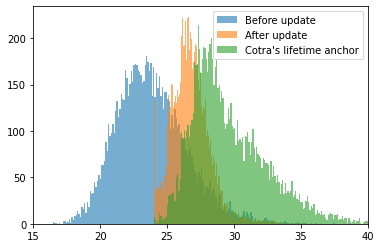

In [14]:
simple_lifetime_anchor = sample_tai_log_flop_needs(brain=lognorm(11,19.5),
                                                   efficiency=const(0),
                                                   transformative_vs_human=const(0),
                                                   horizon_length=const(9),
                                                   scaling_exponent=const(0),
                                                   flops_per_param_per_sec=const(0),
                                                   ref_params_samples=0,
                                                   bayes_update=cotra_bayes_update_against_low_flop,
                                                   n=10000)

simple_lifetime_anchor_noup = sample_tai_log_flop_needs(brain=lognorm(11,19.5),
                                                        efficiency=const(0),
                                                        transformative_vs_human=const(0),
                                                        horizon_length=const(9),
                                                        scaling_exponent=const(0),
                                                        flops_per_param_per_sec=const(0),
                                                        ref_params_samples=0,
                                                        bayes_update=None,
                                                        n=10000)

plot_anchor(simple_lifetime_anchor_noup, alpha=0.6, label='Before update')
plot_anchor(simple_lifetime_anchor, alpha=0.6, label='After update')
plot_anchor(lifetime_anchor, alpha=0.6, label='Cotra\'s lifetime anchor')
plt.xlim([15, 40])
plt.legend()


## Updated Evolution Anchor

{1: 34.01879042203536,
 5: 36.73239313962878,
 10: 38.19879379210743,
 20: 39.99686955905007,
 30: 41.298257152215704,
 40: 42.36562422259887,
 50: 43.372073362676886,
 60: 44.41713418671919,
 70: 45.47437471361352,
 80: 46.7912678923953,
 90: 48.502931403918,
 95: 50.01832101659248,
 99: 53.14806568971202}


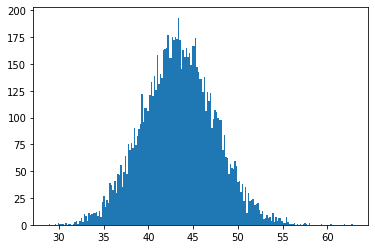

In [15]:
average_ancestor_brain_flops = lognorm(3,6)
log_n_individuals = norm(20,22)
evo_time_log_sec = const(16)

def sample_evolution_anchor(n=1):
    evo_anchor = sample_tai_log_flop_needs(brain=average_ancestor_brain_flops,
                                           efficiency=norm(-6,5),
                                           transformative_vs_human=norm(-2,2),
                                           horizon_length=lambda: sample(log_n_individuals) + sample(evo_time_log_sec),
                                           scaling_exponent=const(0),
                                           flops_per_param_per_sec=const(0),
                                           ref_params_samples=0,
                                           bayes_update=None,
                                           n=n)
    
    anthropic_adjustment = norm(-1.3,1.3)
    
    r_ = random.random()
    environment_adjustment = np.array([sample(lognorm(1,5)) if r_ <= 0.2 else 0 for _ in range(n)])
    
    return evo_anchor + sample(anthropic_adjustment, n=n) + environment_adjustment

updated_evolution_anchor = sample_evolution_anchor(n=10000)
plot_anchor(updated_evolution_anchor)


Cotra's evolution anchor
{1: 32.561898250046156,
 5: 34.68033801488732,
 10: 35.99219904290138,
 20: 37.69746873686019,
 30: 38.903869053805316,
 40: 39.873150823429334,
 50: 40.79621243866647,
 60: 41.70915741746692,
 70: 42.711408388110286,
 80: 43.94261901571175,
 90: 45.58236847622532,
 95: 46.95455854881281,
 99: 49.52079655915339}
Updated evolution anchor
{1: 34.01879042203536,
 5: 36.73239313962878,
 10: 38.19879379210743,
 20: 39.99686955905007,
 30: 41.298257152215704,
 40: 42.36562422259887,
 50: 43.372073362676886,
 60: 44.41713418671919,
 70: 45.47437471361352,
 80: 46.7912678923953,
 90: 48.502931403918,
 95: 50.01832101659248,
 99: 53.14806568971202}


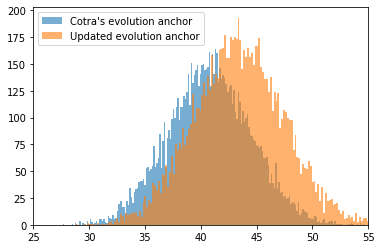

In [16]:
plot_anchor(evolution_anchor, alpha=0.6, label='Cotra\'s evolution anchor')
plot_anchor(updated_evolution_anchor, alpha=0.6, label='Updated evolution anchor')
plt.xlim([25, 55])
plt.legend()

## Meta-anchor

### Horizon length

{1: 0.0,
 5: 0.0,
 10: 0.0,
 20: 0.0,
 30: 0.0,
 40: 0.0,
 50: 1.03491427021322,
 60: 1.8161401026100814,
 70: 2.9334972321524377,
 80: 4.485712690096485,
 90: 6.809096836338953,
 95: 8.771546556048992,
 99: 10.487972979524521}


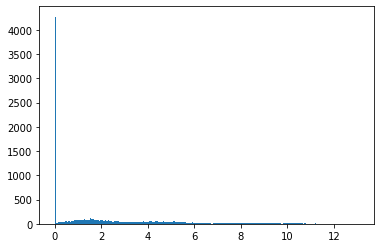

In [17]:
def horizon_length():
    r_ = random.random()
    if r_ < 0.4:
        h = 0
    elif r_ < 0.7:
        h = sample(norm(0,3))
    elif r_ < 0.9:
        h = sample(lognorm(3,7))
    else:
        h = sample(norm(7,11))
        
    if h < 0:
        h = 0
    
    return h

plot_anchor([horizon_length() for s in range(10000)])

{1: 22.158665328304437,
 5: 24.867191242858823,
 10: 25.816277708691324,
 20: 27.228593637715353,
 30: 28.665997030967386,
 40: 30.225085949794117,
 50: 31.853559457628485,
 60: 33.471922446692126,
 70: 35.19806713751238,
 80: 37.46585663029913,
 90: 40.773781005379746,
 95: 43.710847927893745,
 99: 49.94959972106014}


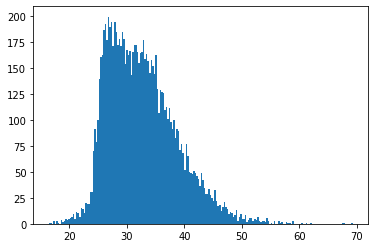

In [18]:
def peter_bayes_update_against_low_flop(f):
    f = f + sample(norm(1,3)) if f < 27 and random.random() > 0.9 else f
    f = f + sample(norm(1,3)) if f < 26 and random.random() > 0.8 else f
    f = f + sample(norm(1,3)) if f < 25 and random.random() > 0.4 else f
    f = f + sample(norm(1,3)) if f < 24 and random.random() > 0.1 else f
    return f

meta_anchor = sample_tai_log_flop_needs(brain=lognorm(11,19.5),
                                        efficiency=norm(-1,2),               # Allows for AI being more efficient
                                        transformative_vs_human=norm(-2,2),
                                        horizon_length=horizon_length,
                                        scaling_exponent=norm(0.5,1.5),   # Update: scaling exponent now centered on 1
                                        flops_per_param_per_sec=norm(1,2),
                                        bayes_update=peter_bayes_update_against_low_flop,
                                        n=10000)
plot_anchor(meta_anchor)


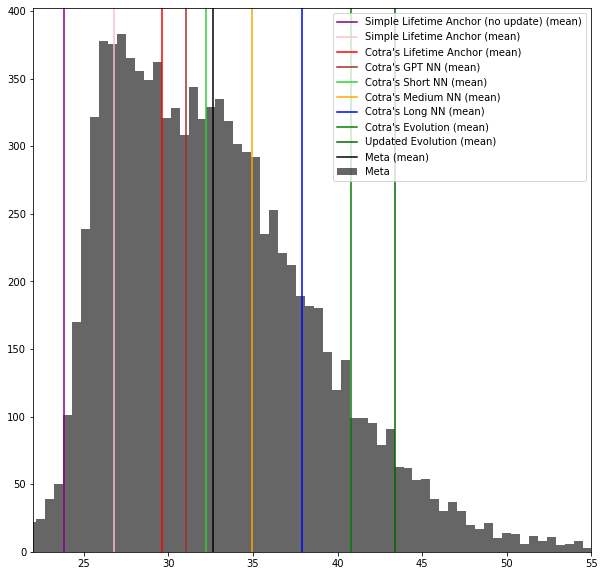

In [19]:
alpha = 0.6; bins = 100
plt.figure(figsize=(10,10))
plt.axvline(x = np.mean(simple_lifetime_anchor_noup), label='Simple Lifetime Anchor (no update) (mean)', color='purple')
plt.axvline(x = np.mean(simple_lifetime_anchor), label='Simple Lifetime Anchor (mean)', color='pink')
plt.axvline(x = np.mean(lifetime_anchor), label='Cotra\'s Lifetime Anchor (mean)', color='red')
plt.axvline(x = np.mean(gpt_anchor), label='Cotra\'s GPT NN (mean)', color='brown')
plt.axvline(x = np.mean(short_horizon_nn_anchor), label='Cotra\'s Short NN (mean)', color='limegreen')
plt.axvline(x = np.mean(medium_horizon_nn_anchor), label='Cotra\'s Medium NN (mean)', color='orange')
plt.axvline(x = np.mean(long_horizon_nn_anchor), label='Cotra\'s Long NN (mean)', color='blue')
plt.axvline(x = np.mean(evolution_anchor), label='Cotra\'s Evolution (mean)', color='green')
plt.axvline(x = np.mean(updated_evolution_anchor), label='Updated Evolution (mean)', color='darkgreen')
plt.axvline(x = np.mean(meta_anchor), label='Meta (mean)', color='black')
plt.hist(meta_anchor, bins=bins, alpha=alpha, label='Meta', color='black', lw=0)
plt.xlim([22, 55])
plt.legend()
plt.show()

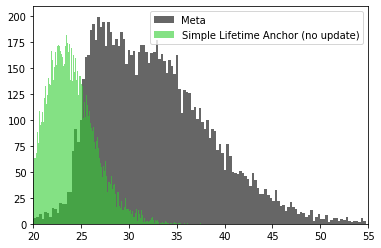

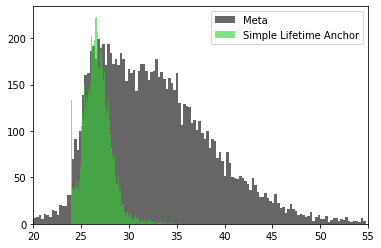

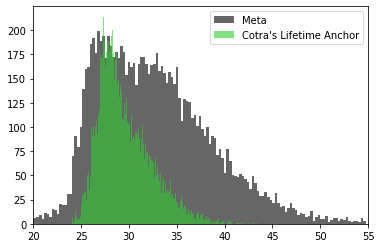

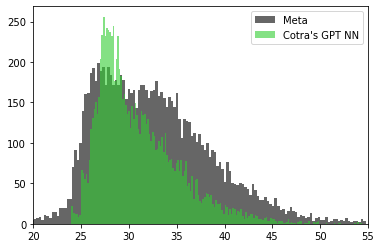

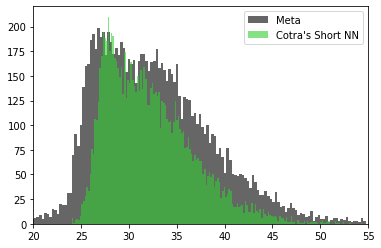

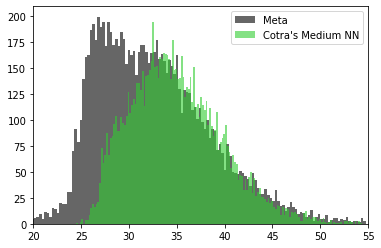

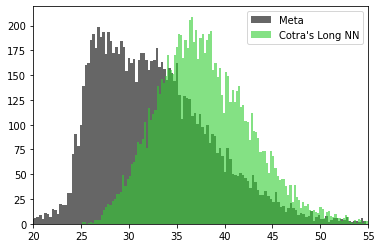

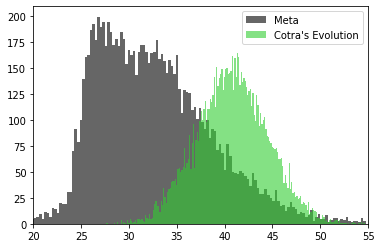

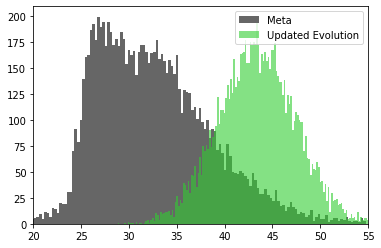

In [20]:
for anchors in [[simple_lifetime_anchor_noup, 'Simple Lifetime Anchor (no update)'],
                [simple_lifetime_anchor, 'Simple Lifetime Anchor'],
                [lifetime_anchor, 'Cotra\'s Lifetime Anchor'],
                [gpt_anchor, 'Cotra\'s GPT NN'],
                [short_horizon_nn_anchor, 'Cotra\'s Short NN'],
                [medium_horizon_nn_anchor, 'Cotra\'s Medium NN'],
                [long_horizon_nn_anchor, 'Cotra\'s Long NN'],
                [evolution_anchor, 'Cotra\'s Evolution'],
                [updated_evolution_anchor, 'Updated Evolution']]:
    alpha = 0.6
    plt.hist(meta_anchor, bins=200, alpha=alpha, label='Meta', color='black', lw=0)
    plt.hist(anchors[0], bins=200, alpha=alpha, label=anchors[1], color='limegreen', lw=0)
    plt.xlim([20, 55])
    plt.legend()
    plt.show()